In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from graph import Graph
from airports import construct_airports
import geopandas as gpd

# Funções auxiliares


In [2]:
def read_polygon(filename, comma_separated=False, invert_x_y=False, close_polygon=True):
    xs = []
    ys = []
    with open(filename) as f:
        for line in f:
            stripped_line = line.strip()
            if len(stripped_line) == 0:
                continue
            if "," in line:
                x, y = [float(value) for value in line.split(",")]
            else:
                x, y = [float(value) for value in line.split()]
            xs.append(x)
            ys.append(y)

    if close_polygon and (xs[0] != xs[-1] or ys[0] != ys[-1]):
        xs.append(xs[0])
        ys.append(ys[0])

    if invert_x_y:
        return ys, xs
    else:
        return xs, ys


In [3]:
def plot_path(path, df_airports, ax):
    xs = []
    ys= []
    names = []
    for airport in path:
        row = df_airports[df_airports.id == airport].iloc[0]
        lon = row["lon"]
        lat = row["lat"]
        # x, y = utm.from_latlon(lat, lon)[:2]
        x, y = lon, lat
        xs.append(x)
        ys.append(y)
        names.append(row["city"])

    # Plot xs and ys with arrows indicating the direction
    ax.plot(xs, ys, marker='o', lw=0)
    for i in range(len(xs)-1):
        ax.annotate("", xy=(xs[i+1], ys[i+1]), xytext=(xs[i], ys[i]), arrowprops=dict(arrowstyle="->"), color='r')


    return xs, ys, names

# Construindo Dataframe dos aeroportos

In [4]:
columns = ["Aeroporto.Origem", "Cidade.Origem", "Pais.Origem", "Aeroporto.Destino", "Cidade.Destino", "Pais.Destino", "LatOrig", "LongOrig", "LatDest", "LongDest"]
group_columns = columns[:6]

In [5]:
df = pd.read_csv('BrFlights2.csv', encoding='latin1')
df = df[columns]

# Exchange latitude and longitude on Guiana
df_guiana = df[(df["Pais.Destino"] == "Guiana")]
lat = df_guiana["LatDest"]
df.loc[df["Pais.Destino"] == "Guiana", "LatDest"] = df_guiana["LongDest"]
df.loc[df["Pais.Destino"] == "Guiana", "LongDest"] = lat

df_guiana = df[(df["Pais.Origem"] == "Guiana")]
lat = df_guiana["LatOrig"]
df.loc[df["Pais.Origem"] == "Guiana", "LatOrig"] = df_guiana["LongOrig"]
df.loc[df["Pais.Origem"] == "Guiana", "LongOrig"] = lat

df_group = df.groupby(group_columns).mean().reset_index()
df_group.to_csv("BrFlights2_group_guiana_corrected.csv", index=False)
del df

In [6]:
df_group = pd.read_csv('BrFlights2_group_guiana_corrected.csv')


In [7]:
# Load the world map data from Natural Earth
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [8]:
df_airports, id_to_airport = construct_airports(df_group)

In [11]:
g = Graph(len(df_airports))

for row in df_group.iterrows():
    id0 = df_airports[df_airports.name == row[1]["Aeroporto.Origem"]].iloc[0]["id"]
    id1 = df_airports[df_airports.name == row[1]["Aeroporto.Destino"]].iloc[0]["id"]
    g.add_edge(id0, id1, check=True)
    

/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


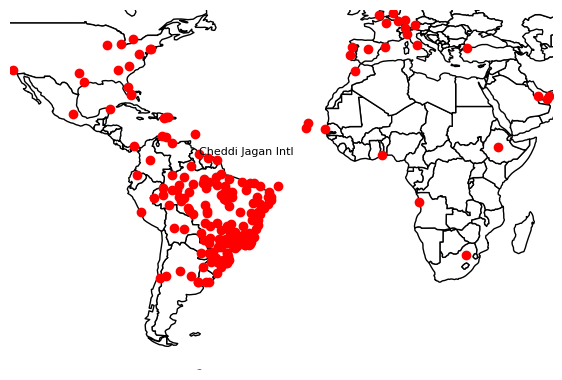

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

world.plot(ax=ax, color='white', edgecolor='black')

ax.plot(df_airports.lon, df_airports.lat, marker='o', lw=0, color='r')

xmin, xmax = df_airports.lon.min(), df_airports.lon.max()
ymin, ymax = df_airports.lat.min(), df_airports.lat.max()

ymin = df_airports[df_airports.country == "Guiana"].lon.min()

ax.set_xlim(xmin-1, xmax+1)
ax.set_ylim(ymin-5, ymax+1)

for row in df_airports.iterrows():
    if row[1].country == "Guiana":
        ax.text(row[1].lon, row[1].lat, row[1].city, fontsize=8)

ax.set_axis_off()

plt.savefig("tex/figs/corrigido_guiana.pdf")
plt.show()

/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


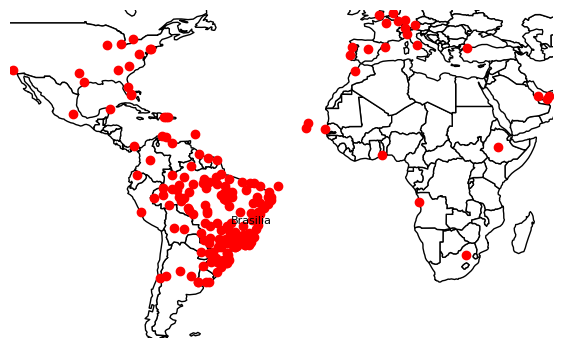

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

world.plot(ax=ax, color='white', edgecolor='black')

ax.plot(df_airports.lon, df_airports.lat, marker='o', lw=0, color='r')

xmin, xmax = df_airports.lon.min(), df_airports.lon.max()
ymin, ymax = df_airports.lat.min(), df_airports.lat.max()

ymin = df_airports[df_airports.city == "Brasilia"].lon.min()

ax.set_xlim(xmin-1, xmax+1)
ax.set_ylim(ymin-5, ymax+1)

for row in df_airports.iterrows():
    if row[1].city == "Brasilia":
        ax.text(row[1].lon, row[1].lat, row[1].city, fontsize=8)

ax.set_axis_off()
plt.show()

# Questão 3

## Item a

In [14]:
brasilia_id = df_airports[df_airports.city == "Brasilia"].iloc[0]["id"]
print(brasilia_id)


54


In [15]:
marcado, visit_order = g.dfs(brasilia_id)
print(visit_order)

[1, 68, 5, 132, 5, 61, 168, 53, 32, 1, 122, 134, 99, 49, 75, 120, 119, 1, 181, 8, 51, 1, 4, 1, 117, 149, 49, 148, 146, 137, 1, 125, 99, 12, 1, 1, 76, 1, 6, 2, 1, 189, 177, 58, 140, 174, 79, 129, 78, 109, 1, 64, 180, 187, 164, 175, 1, 1, 130, 63, 154, 76, 36, 60, 59, 1, 58, 1, 185, 1, 1, 55, 184, 72, 178, 52, 82, 51, 20, 127, 126, 49, 150, 151, 26, 84, 13, 88, 81, 1, 1, 45, 91, 1, 24, 24, 169, 170, 108, 106, 38, 81, 88, 87, 1, 80, 171, 173, 33, 31, 1, 1, 24, 24, 67, 65, 57, 56, 50, 167, 166, 40, 165, 162, 37, 35, 161, 34, 24, 159, 158, 157, 30, 22, 155, 23, 136, 21, 139, 115, 114, 139, 138, 24, 24, 144, 90, 28, 9, 70, 0, 28, 152, 147, 73, 139, 141, 138, 142, 27, 25, 24, 144, 145, 143, 95, 128, 113, 112, 94, 22, 133, 7, 18, 16, 15, 14, 86, 100, 97, 11, 91, 92, 10, 84, 85, 77, 3, 8, 19]


/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


KeyboardInterrupt: 

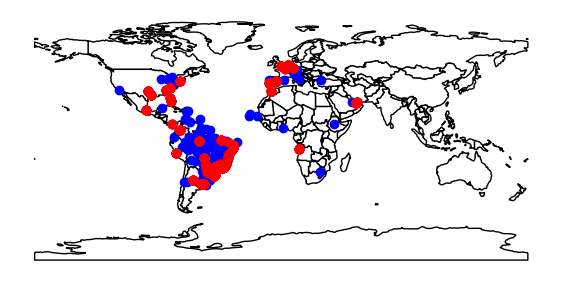

In [16]:
import os
os.makedirs("tex/figs/paths", exist_ok=True)

marcado, visit_order = g.dfs(brasilia_id)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
world.plot(ax=ax, color='white', edgecolor='black')
ax.plot(df_airports.lon, df_airports.lat, marker='o', lw=0, color='b')
ax.set_axis_off()

for i in range(1,len(visit_order)):
    ax.plot(df_airports.lon[:i], df_airports.lat[:i], marker='o', lw=0, color='r')
    plt.savefig("tex/figs/paths/dfs_{}.pdf".format(i))
plt.close()




In [ ]:
np.sum(marcado)

In [ ]:
len(df_airports)

## Item b


In [17]:
df_airports[(df_airports.city == "Roma") | (df_airports.city =="Fernando De Noronha")]

,index,name,country,city,lat,lon,id
56,Roma,Roma,Italia,Roma,41.799053,12.592979,56
147,Fernando De Noronha,Fernando De Noronha,Brasil,Fernando De Noronha,-3.854614,-32.424385,147


In [18]:
roma_id = df_airports[df_airports.city == "Roma"].iloc[0].id
fernando_noronha_id = df_airports[df_airports.city == "Fernando De Noronha"].iloc[0].id
print(f"Roma = {roma_id} and Fernando De Noronha = {fernando_noronha_id}")

Roma = 56 and Fernando De Noronha = 147


In [19]:
marcado, caminho = g.bfs(roma_id)
roma_to_fernando = g.build_path(caminho, fernando_noronha_id)

/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


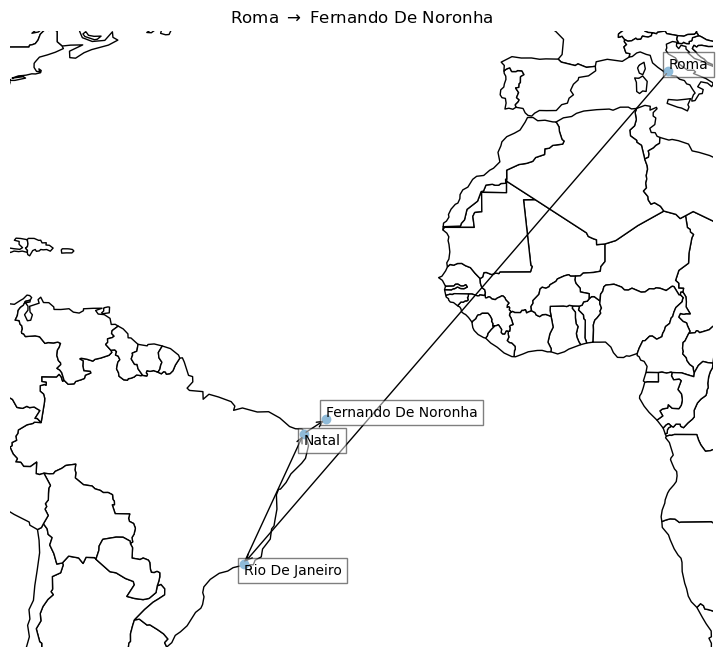

In [20]:
# Plot the world map
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='white', edgecolor='k')
xs, ys, names = plot_path(roma_to_fernando, df_airports, ax)


# Customize the plot (optional)
ax.set_title(r"Roma $\rightarrow$ Fernando De Noronha")
ax.set_axis_off()

xmin, ymin, _,_ = world[world.name == "Brazil"].geometry.iloc[0].bounds
_, _, xmax,ymax = world[world.name == "Italy"].geometry.iloc[0].bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

plt.savefig("./tex/figs/roma_fernando_noronha.pdf", bbox_inches='tight', pad_inches=0)

for i in range(len(xs)):
    if i == 0:
        ax.text(xs[i], ys[i], names[i], va="bottom", ha="left", bbox=dict(facecolor="w",alpha=0.5))
    elif i == 3:
        ax.text(xs[i], ys[i], names[i], va="bottom", ha="left", bbox=dict(facecolor="w",alpha=0.5))
    else:
        ax.text(xs[i], ys[i], names[i], va="top", ha="left", bbox=dict(facecolor="w",alpha=0.5))

plt.savefig("./tex/figs/roma_fernando_noronha_names.pdf", bbox_inches='tight', pad_inches=0)

# Display the plot
plt.show()